# Results for TENCON 2024 paper
## Experiment 1: Algorithm Performance Comparison

#### Title: Performance Analysis of Selected Swarm-based Robot Search Algorithms for Target Tracking 

#### Authors:

Christian C. Anabeza,
Marck Herzon C. Barrion,
Matthea Flynne T. Sim,
Argel A. Bandala

## Accuracy across Algorithms

Processing Random Walk in /home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_10bots_20targets
Found 4 files in /home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_10bots_20targets/38
Found 2 files in /home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_10bots_20targets/44
Found 1 files in /home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_10bots_20targets/50
Found 1 files in /home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_10bots_20targets/49
Found 3 files in /home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_10bots_20targets/35
Found 1 files in /home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_10bots_20targets/3
Found 2 files in /home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_10bots_20targets/11
Found 3 files in /home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_10bots_20targets/48
Found 3 files in /home/herzon/re

/tmp/ipykernel_16382/2317358528.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Algorithm', y='Accuracy', data=df, palette=pastel_palette)


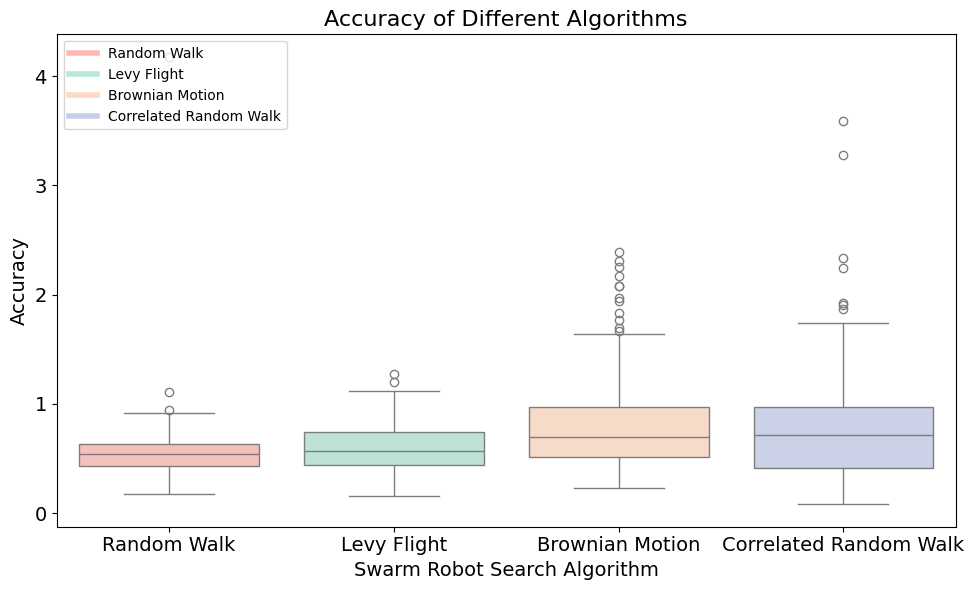

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Function to read accuracy data from a given directory
def read_accuracy_data(base_dir, actual_black_tiles, skip_lines=False):
    accuracies = []
    # Find all subdirectories in the base directory
    sub_dirs = [os.path.join(base_dir, d) for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

    for sub_dir in sub_dirs:
        # Find all files that match the pattern e-puck*.csv in each subdirectory
        csv_files = glob.glob(os.path.join(sub_dir, 'e-puck*.csv'))
        
        # Debug print to check if files are being found
        print(f"Found {len(csv_files)} files in {sub_dir}")

        for run_path in csv_files:
            if os.path.isfile(run_path):
                try:
                    if skip_lines:
                        df = pd.read_csv(run_path, skip_blank_lines=True)
                    else:
                        df = pd.read_csv(run_path)

                    final_average_count = df['average_count'].iloc[-1]
                    accuracy = final_average_count / actual_black_tiles
                    accuracies.append(accuracy)
                except Exception as e:
                    print(f"Error reading {run_path}: {e}")
    
    return accuracies

# Base directories for each algorithm
directories = {
    "Random Walk": "/home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_10bots_20targets",
    "Levy Flight": "/home/herzon/results-thesis/subthesis-3/raw_files/levy_flight/outputs_10bots_20targets",
    "Brownian Motion": "/home/herzon/results-thesis/subthesis-3/raw_files/brownian_motion/outputs_10bots_20targets",
    "Correlated Random Walk": "/home/herzon/results-thesis/subthesis-3/raw_files/correlated_rw/outputs_10bots_20targets"
}

# Actual number of black tiles
actual_black_tiles = 20

# Collect accuracy data for each algorithm
data = []

for algorithm, dir_path in directories.items():
    print(f"Processing {algorithm} in {dir_path}")  # Debug print for directory processing
    if algorithm in ["Random Walk", "Levy Flight"]:
        accuracies = read_accuracy_data(dir_path, actual_black_tiles, skip_lines=True)
    else:
        accuracies = read_accuracy_data(dir_path, actual_black_tiles, skip_lines=False)
    
    for accuracy in accuracies:
        data.append({"Algorithm": algorithm, "Accuracy": accuracy})

# Print the data list to check if it has been populated correctly
print("Data list:", data)

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

# Print the DataFrame to check if the 'Algorithm' column exists
print("DataFrame:", df)

# Print descriptive statistics
descriptive_stats = df.groupby('Algorithm')['Accuracy'].describe()
print(descriptive_stats)

# Define a pastel color palette
pastel_palette = {
    "Random Walk": "#FFB7B2",  # Light pink
    "Levy Flight": "#B5EAD7",  # Light mint green
    "Brownian Motion": "#FFDAC1",  # Light peach
    "Correlated Random Walk": "#C7CEEA"  # Light lavender
}

# Plotting the accuracies using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Algorithm', y='Accuracy', data=df, palette=pastel_palette)
plt.title('Accuracy of Different Algorithms', fontsize=16)
plt.xlabel('Swarm Robot Search Algorithm', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)

# Add legend
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in pastel_palette.values()]
labels = pastel_palette.keys()
plt.legend(handles, labels, title='', loc='upper left', fontsize=10)

plt.tight_layout()

# Save the figure
plt.savefig('/home/herzon/results-thesis/subthesis-3/final_plots/1_results.png', format='png', dpi=1200)

plt.show()
